<a href="https://colab.research.google.com/github/Shivamgond2022/demo/blob/main/SVM_Salary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1) Prepare a classification model using SVM for salary data 

Data Description:

age -- age of a person
workclass	-- A work class is a grouping of work 
education	-- Education of an individuals	
maritalstatus -- Marital status of an individulas	
occupation	 -- occupation of an individuals
relationship -- 	
race --  Race of an Individual
sex --  Gender of an Individual
capitalgain --  profit received from the sale of an investment	
capitalloss	-- A decrease in the value of a capital asset
hoursperweek -- number of hours work per week	
native -- Native of an individual
Salary -- salary of an individual

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [ ]:
train = pd.read_csv("/content/SalaryData_Train(1).csv")
train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
train.shape

(30161, 14)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [ ]:
train.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [ ]:
test = pd.read_csv("/content/SalaryData_Test(1).csv")
test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [ ]:
test.shape

(15060, 14)

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [ ]:
test.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

# Preprocessing

In [ ]:
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()

In [ ]:
train["workclass"] = encoder.fit_transform(train["workclass"])
train["education"] = encoder.fit_transform(train["education"])
train["maritalstatus"] = encoder.fit_transform(train["maritalstatus"])
train["occupation"] = encoder.fit_transform(train["occupation"])
train["relationship"] = encoder.fit_transform(train["relationship"])
train["race"] = encoder.fit_transform(train["race"])
train["sex"] = encoder.fit_transform(train["sex"])
train["native"] = encoder.fit_transform(train["native"])
train["Salary"] = encoder.fit_transform(train["Salary"])
train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,0
1,50,4,9,13,2,3,0,4,1,0,0,13,37,0
2,38,2,11,9,0,5,1,4,1,0,0,40,37,0
3,53,2,1,7,2,5,0,2,1,0,0,40,37,0
4,28,2,9,13,2,9,5,2,0,0,0,40,4,0


In [ ]:
train["Salary"].value_counts()

0    22653
1     7508
Name: Salary, dtype: int64

In [ ]:
test["workclass"] = encoder.fit_transform(test["workclass"])
test["education"] = encoder.fit_transform(test["education"])
test["maritalstatus"] = encoder.fit_transform(test["maritalstatus"])
test["occupation"] = encoder.fit_transform(test["occupation"])
test["relationship"] = encoder.fit_transform(test["relationship"])
test["race"] = encoder.fit_transform(test["race"])
test["sex"] = encoder.fit_transform(test["sex"])
test["native"] = encoder.fit_transform(test["native"])
test["Salary"] = encoder.fit_transform(test["Salary"])
test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,7,4,6,3,2,1,0,0,40,37,0
1,38,2,11,9,2,4,0,4,1,0,0,50,37,0
2,28,1,7,12,2,10,0,4,1,0,0,40,37,1
3,44,2,15,10,2,6,0,2,1,7688,0,40,37,1
4,34,2,0,6,4,7,1,4,1,0,0,30,37,0


In [ ]:
test["Salary"].value_counts()

0    11360
1     3700
Name: Salary, dtype: int64

# joining train test data

In [ ]:
df =pd.DataFrame()
frames =[train,test]
df =pd.concat(frames)

In [ ]:
df

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,0
1,50,4,9,13,2,3,0,4,1,0,0,13,37,0
2,38,2,11,9,0,5,1,4,1,0,0,40,37,0
3,53,2,1,7,2,5,0,2,1,0,0,40,37,0
4,28,2,9,13,2,9,5,2,0,0,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,2,9,13,4,9,3,4,1,0,0,40,37,0
15056,39,2,9,13,0,9,1,4,0,0,0,36,37,0
15057,38,2,9,13,2,9,0,4,1,0,0,50,37,0
15058,44,2,9,13,0,0,3,1,1,5455,0,40,37,0


In [ ]:
df.shape

(45221, 14)

In [ ]:
df.corr()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
age,1.000000,0.085890,-0.003497,0.037623,-0.271616,-0.004474,-0.247561,0.023781,0.082040,0.079682,0.059426,0.101992,-0.002879,0.237035
workclass,0.085890,1.000000,0.017852,0.040778,-0.033217,0.017508,-0.065048,0.049767,0.069633,0.034542,0.008261,0.051366,0.003889,0.015657
education,-0.003497,0.017852,1.000000,0.347451,-0.041547,-0.033500,-0.013190,0.011446,-0.027531,0.029893,0.016740,0.060890,0.078800,0.081214
educationno,0.037623,0.040778,0.347451,1.000000,-0.064986,0.089686,-0.088431,0.031655,0.003416,0.126907,0.081741,0.146206,0.094125,0.332801
maritalstatus,-0.271616,-0.033217,-0.041547,-0.064986,1.000000,0.016399,0.180430,-0.070311,-0.119982,-0.042397,-0.034940,-0.183178,-0.022880,-0.192701
occupation,-0.004474,0.017508,-0.033500,0.089686,0.016399,1.000000,-0.051644,-0.000026,0.056626,0.019435,0.015271,0.016160,-0.002628,0.049788
relationship,-0.247561,-0.065048,-0.013190,-0.088431,0.180430,-0.051644,1.000000,-0.118588,-0.582977,-0.056817,-0.058485,-0.259194,-0.007016,-0.253399
race,0.023781,0.049767,0.011446,0.031655,-0.070311,-0.000026,-0.118588,1.000000,0.088949,0.014079,0.020917,0.044739,0.126192,0.070849
sex,0.082040,0.069633,-0.027531,0.003416,-0.119982,0.056626,-0.582977,0.088949,1.000000,0.047441,0.046639,0.231427,-0.004653,0.215748
capitalgain,0.079682,0.034542,0.029893,0.126907,-0.042397,0.019435,-0.056817,0.014079,0.047441,1.000000,-0.032095,0.083880,0.007641,0.221033


In [ ]:
df["Salary"].value_counts()

0    34013
1    11208
Name: Salary, dtype: int64

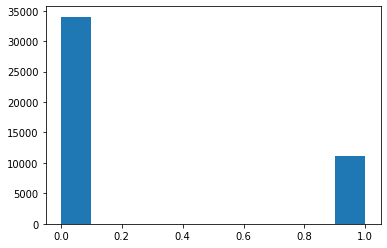

In [ ]:
plt.hist(df["Salary"])
plt.show()

- (<=50k) == 34103
- (>50k ) == 11208 
 

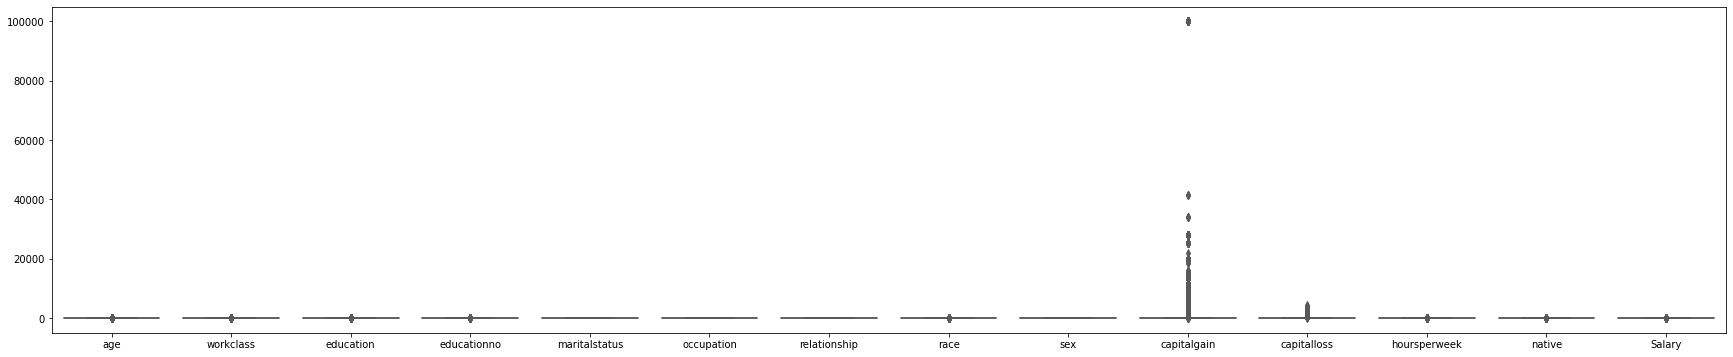

In [ ]:
plt.figure(figsize=(30,6))
import seaborn as sns
sns.boxplot(data=df, orient="v", palette="Set2")

- Yes, there are many outliers present in data

# Checking for duplicates value

In [ ]:
df.duplicated().value_counts()

False    39239
True      5982
dtype: int64

In [ ]:
df.drop_duplicates(inplace = True)

In [ ]:
df.duplicated().value_counts() # droped duolicated values from dataset

False    39239
dtype: int64

# Train_Test_Split

In [ ]:
x = df.iloc[:,0:13]
y = df["Salary"]

In [ ]:
x.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,39,5,9,13,4,0,1,4,1,2174,0,40,37
1,50,4,9,13,2,3,0,4,1,0,0,13,37
2,38,2,11,9,0,5,1,4,1,0,0,40,37
3,53,2,1,7,2,5,0,2,1,0,0,40,37
4,28,2,9,13,2,9,5,2,0,0,0,40,4


In [ ]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Salary, dtype: int64

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=100)

In [ ]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((27467, 13), (11772, 13), (27467,), (11772,))

# Model Building

In [ ]:
clf = SVC(random_state=40)
clf.fit(x_train,y_train)

SVC(random_state=40)

In [ ]:
# Predicting on train data
y_pred = clf.predict(x_train)

In [ ]:
acc = accuracy_score(y_train, y_pred)*100
print("Accuracy=",acc)# accuracy on training dataset

Accuracy= 79.53180179852185


In [ ]:
#Predicting on test data set
y_pred_test = clf.predict(x_test)

In [ ]:
acc = accuracy_score(y_test, y_pred_test)*100
print("Accuracy=",acc)# accuracy on training dataset

Accuracy= 79.55317703024124


In [ ]:
confusion_matrix(y_test, y_pred_test)

array([[8473,  325],
       [2082,  892]])

In [ ]:
print('Classification Report:\n',classification_report(y_test,y_pred_test))

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.96      0.88      8798
           1       0.73      0.30      0.43      2974

    accuracy                           0.80     11772
   macro avg       0.77      0.63      0.65     11772
weighted avg       0.79      0.80      0.76     11772



# Conclution 
- Their are many points which are missclassified
- And their is no much diffrence between train and test score == 79.53, 79.55